# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Clouds":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[],
    "Humidity":[],
    "Wind Speed":[]
})


recordCount = 1
print("Beginning Data Retrieval")
print("-------------------------")
#query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
for i in range(len(cities)):
    query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
    try:
        #query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {recordCount} of set 1 | {cities[i]}")
        response = requests.get(query_url + city).json()
        city_lat = response['coord']['lat']
        city_long = response['coord']['lon']
        city_temp = response['main']['temp_max']
        city_clouds = response['clouds']['all']
        city_country = response['sys']['country']
        city_humidity = response['main']['humidity']
        city_wind = response['wind']['speed']
        city_date = time.strftime('%Y-%m-%d', time.localtime(response["dt"]))
            
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Clouds":city_clouds,
            "Latitude":city_lat,
            "Longitude":city_long,
            "Date":city_date,
            "Temperature":city_temp,
            "Humidity":city_humidity,
            "Wind Speed":city_wind
        }, ignore_index=True)
        recordCount += 1
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


 


    

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | devonport
Processing Record 2 of set 1 | rikitea
Processing Record 3 of set 1 | hilo
Processing Record 4 of set 1 | nishihara
Processing Record 5 of set 1 | meyungs
City not found. Skipping...
Processing Record 5 of set 1 | bilma
Processing Record 6 of set 1 | abdulino
Processing Record 7 of set 1 | lebu
Processing Record 8 of set 1 | pevek
Processing Record 9 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of set 1 | barra patuca
Processing Record 10 of set 1 | rezekne
Processing Record 11 of set 1 | cape town
Processing Record 12 of set 1 | busselton
Processing Record 13 of set 1 | zyryanovsk
Processing Record 14 of set 1 | tubruq
City not found. Skipping...
Processing Record 14 of set 1 | bishna
City not found. Skipping...
Processing Record 14 of set 1 | shambu
Processing Record 15 of set 1 | la ronge
Processing Record 16 of set 1 | abu samrah
Processing Record 17 of set 1 |

City not found. Skipping...
Processing Record 161 of set 1 | upernavik
Processing Record 162 of set 1 | deputatskiy
Processing Record 163 of set 1 | saint-philippe
Processing Record 164 of set 1 | uige
Processing Record 165 of set 1 | hasaki
Processing Record 166 of set 1 | ngunguru
Processing Record 167 of set 1 | kodinsk
Processing Record 168 of set 1 | we
City not found. Skipping...
Processing Record 168 of set 1 | kindu
Processing Record 169 of set 1 | saskylakh
Processing Record 170 of set 1 | hithadhoo
Processing Record 171 of set 1 | asyut
Processing Record 172 of set 1 | canto do buriti
Processing Record 173 of set 1 | sabaudia
Processing Record 174 of set 1 | marawi
Processing Record 175 of set 1 | arawa
Processing Record 176 of set 1 | aksu
Processing Record 177 of set 1 | kahului
Processing Record 178 of set 1 | maimon
City not found. Skipping...
Processing Record 178 of set 1 | castro
Processing Record 179 of set 1 | terrace
Processing Record 180 of set 1 | ejido
Processing

Processing Record 322 of set 1 | buluang
Processing Record 323 of set 1 | maniitsoq
Processing Record 324 of set 1 | pierre
Processing Record 325 of set 1 | gurgan
City not found. Skipping...
Processing Record 325 of set 1 | alihe
Processing Record 326 of set 1 | naze
Processing Record 327 of set 1 | faya
Processing Record 328 of set 1 | aykhal
Processing Record 329 of set 1 | cidreira
Processing Record 330 of set 1 | haines junction
Processing Record 331 of set 1 | aku
Processing Record 332 of set 1 | primorsko-akhtarsk
Processing Record 333 of set 1 | flinders
Processing Record 334 of set 1 | escarcega
Processing Record 335 of set 1 | tahta
City not found. Skipping...
Processing Record 335 of set 1 | daphne
Processing Record 336 of set 1 | svirstroy
Processing Record 337 of set 1 | nevelsk
Processing Record 338 of set 1 | igarka
Processing Record 339 of set 1 | aflu
City not found. Skipping...
Processing Record 339 of set 1 | kurilsk
Processing Record 340 of set 1 | tiarei
Processing

Processing Record 494 of set 1 | elliot lake
Processing Record 495 of set 1 | roma
Processing Record 496 of set 1 | hihifo
City not found. Skipping...
Processing Record 496 of set 1 | maymyo
Processing Record 497 of set 1 | whitianga
Processing Record 498 of set 1 | shalya
Processing Record 499 of set 1 | kjollefjord
Processing Record 500 of set 1 | torres
Processing Record 501 of set 1 | seoul
Processing Record 502 of set 1 | chiapilla
Processing Record 503 of set 1 | man
Processing Record 504 of set 1 | sri aman
Processing Record 505 of set 1 | mazatlan
Processing Record 506 of set 1 | horsham
Processing Record 507 of set 1 | dongargaon
Processing Record 508 of set 1 | dekar
Processing Record 509 of set 1 | kenora
Processing Record 510 of set 1 | bandarbeyla
Processing Record 511 of set 1 | plougastel-daoulas
Processing Record 512 of set 1 | xining
Processing Record 513 of set 1 | juegang
Processing Record 514 of set 1 | eureka
Processing Record 515 of set 1 | samalaeulu
City not fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_df.to_csv(output_data_file)

In [19]:
weather_df

,City Name,Country,Clouds,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed
0,devonport,AU,0.0,-41.18,146.36,2018-10-27,283.979,68.0,1.22
1,rikitea,PF,32.0,-23.12,-134.97,2018-10-27,296.029,100.0,6.57
2,hilo,US,20.0,19.71,-155.08,2018-10-27,301.150,69.0,2.60
3,nishihara,JP,75.0,35.74,139.53,2018-10-27,290.150,67.0,2.60
4,bilma,NE,32.0,18.69,12.92,2018-10-27,297.479,29.0,2.92
5,abdulino,RU,48.0,53.68,53.66,2018-10-27,270.279,91.0,3.27
6,lebu,ET,0.0,8.96,38.73,2018-10-27,279.204,91.0,1.42
7,pevek,RU,48.0,69.70,170.27,2018-10-27,263.454,100.0,5.02
8,barra patuca,HN,88.0,15.80,-84.28,2018-10-27,300.204,96.0,3.72
9,rezekne,LV,76.0,56.50,27.32,2018-10-27,278.104,93.0,7.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

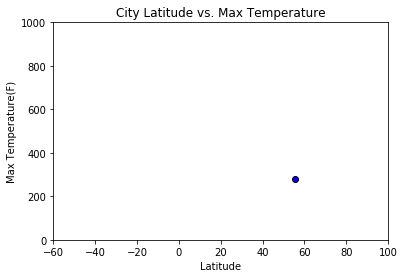

In [10]:
plt.scatter(city_lat, city_temp, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 1000)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.show()

#### Latitude vs. Humidity Plot

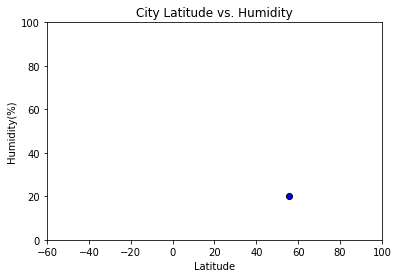

In [7]:
plt.scatter(city_lat, city_humidity, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.show()

#### Latitude vs. Cloudiness Plot

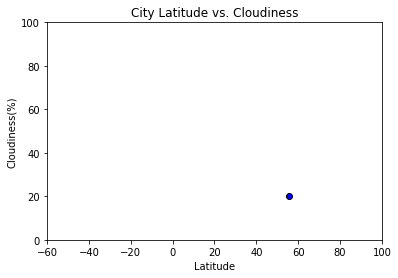

In [8]:
plt.scatter(city_lat, city_clouds, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.show()

#### Latitude vs. Wind Speed Plot

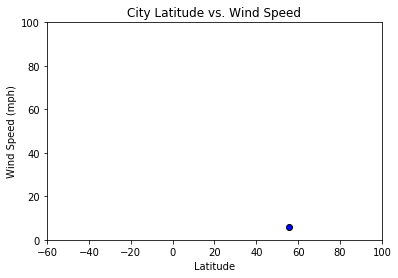

In [9]:
plt.scatter(city_lat, city_wind, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()